In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cardio_alco = pd.read_csv('C:/Users/PYTHON/Data Science Projects/Turing tests/input/cardio_alco.csv')
cardio_base = pd.read_csv('C:/Users/PYTHON/Data Science Projects/Turing tests/input/cardio_base.csv')
covid_data = pd.read_csv('C:/Users/PYTHON/Data Science Projects/Turing tests/input/covid_data.csv')


In [2]:
cardio_alco.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [5]:
print(type(cardio_alco))

<class 'pandas.core.frame.DataFrame'>


In [6]:
cardio_alco.columns

Index(['id;alco'], dtype='object')

In [7]:
cardio_alco.shape


(56903, 1)

In [3]:
cardio_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [8]:
cardio_base.shape

(70000, 9)

In [11]:
cardio_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [9]:
covid_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [27]:
covid_data.shape

(23082, 8)

Merge the cardio alco and cardio base data

In [12]:
# split 'id;alco' into separate 'id' and 'alco' columns
cardio_alco[['id','alco']] = cardio_alco['id;alco'].str.split(';', expand=True)
cardio_alco['id'] = cardio_alco['id'].astype(int)
cardio_alco['alco'] = cardio_alco['alco'].astype(int)

cardio_alco.drop(columns=['id;alco'], inplace=True)

In [13]:
cardio_alco.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [16]:
cardio_alco['id'].unique

<bound method Series.unique of 0           44
1           45
2           46
3           47
4           49
         ...  
56898    99949
56899    99950
56900    99951
56901    99952
56902    99954
Name: id, Length: 56903, dtype: int32>

In [18]:
merged_df = cardio_base.merge(cardio_alco, on='id', how='left')
print(merged_df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0          0  18393       2     168    62.0    110     80            1      0   
1          1  20228       1     156    85.0    140     90            3      0   
2          2  18857       1     165    64.0    130     70            3      0   
3          3  17623       2     169    82.0    150    100            1      0   
4          4  17474       1     156    56.0    100     60            1      0   
...      ...    ...     ...     ...     ...    ...    ...          ...    ...   
69995  99993  19240       2     168    76.0    120     80            1      1   
69996  99995  22601       1     158   126.0    140     90            2      0   
69997  99996  19066       2     183   105.0    180     90            3      0   
69998  99998  22431       1     163    72.0    135     80            1      0   
69999  99999  20540       1     170    72.0    120     80            2      0   

       alco  
0       NaN  

In [19]:

merged_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,18393,2,168,62.0,110,80,1,0,NaN
1,1,20228,1,156,85.0,140,90,3,0,NaN
2,2,18857,1,165,64.0,130,70,3,0,NaN
3,3,17623,2,169,82.0,150,100,1,0,NaN
4,4,17474,1,156,56.0,100,60,1,0,NaN


In [20]:
merged_df.isnull().sum()

id                 0
age                0
gender             0
height             0
weight             0
ap_hi              0
ap_lo              0
cholesterol        0
smoke              0
alco           13097
dtype: int64

In [22]:
missing_percentage = merged_df.isnull().mean() * 100
print(missing_percentage)

id              0.00
age             0.00
gender          0.00
height          0.00
weight          0.00
ap_hi           0.00
ap_lo           0.00
cholesterol     0.00
smoke           0.00
alco           18.71
dtype: float64


In [23]:
merged_df = merged_df.dropna()

In [24]:
merged_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
alco           0
dtype: int64

In [25]:
import seaborn as sns

In [26]:
merged_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
count,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000
mean,48472.162065,19469.309966,1.350667,164.356027,74.163482,129.002408,96.752350,1.367872,0.088554,0.053442
std,30994.121701,2466.267893,0.477183,8.215067,14.381791,160.259577,189.390334,0.680889,0.284102,0.224915
min,44.000000,10798.000000,1.000000,55.000000,10.000000,-140.000000,-70.000000,1.000000,0.000000,0.000000
25%,20401.000000,17671.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,0.000000
50%,40763.000000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,0.000000
75%,77109.500000,21324.500000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,0.000000
max,99954.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,1.000000


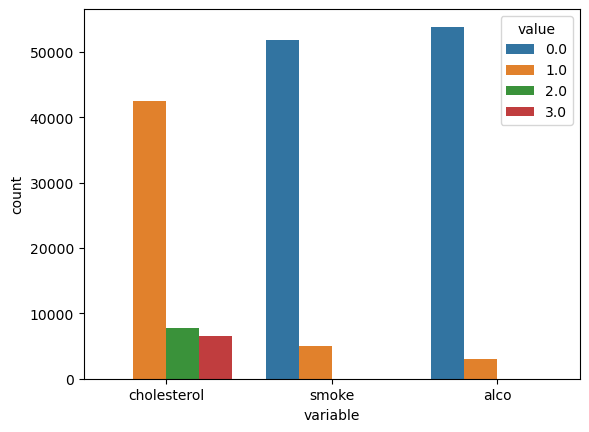

In [28]:
# categorical variables
df_categorical = merged_df.loc[:,['cholesterol', 'smoke','alco']]
sns.countplot(x="variable", hue="value", data=pd.melt(df_categorical));

In [ ]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Bar chart for gender distribution
gender_counts = merged_df['gender'].value_counts()
axes[0, 0].bar(gender_counts.index, gender_counts.values)
axes[0, 0].set_title('Gender Distribution')

#